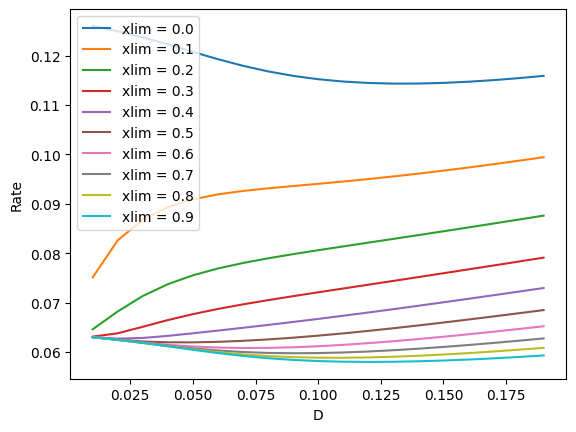

In [64]:
import numpy as np
import matplotlib.pyplot as plt

lower = -1
n_steps = 120

def V(x):
    return 0.25*x**4 - 0.5*x**2

def func1(x, D):
    return np.exp(V(x)/D)

def simple_sum(f, a, b, n, D):
    if n % 2 == 1:
        raise ValueError("n must be even for Simpson's rule.")
    h = (b - a) / n
    result = f(a, D) + f(b, D) 
    for i in range(1, n):
        x = a + i * h
        coefficient = 4 if i % 2 != 0 else 2
        result += coefficient * f(x, D)
    result *= h / 3
    return result


def first(x, D):
    omega_0 = 1
    C = np.sqrt(D)*omega_0/(2*np.pi)
    return C/simple_sum(func1, lower, x, n_steps, D)

D_values = np.arange(0.01, 0.2, 0.01)
xlim_values = np.arange(0, 1, 0.1)

for i in xlim_values:
    rate_values = [first(i, D) for D in D_values]  # Calculate first(i, D) for each D
    plt.plot(D_values, rate_values, label=f'xlim = {i:.1f}')
    
plt.xlabel("D")
plt.ylabel("Rate")
plt.legend()
plt.show()
